In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
titanic = pd.read_csv("titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [35]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [36]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [37]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [38]:
titanic['Age'].fillna(titanic['Age'].median(), inplace=True)
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

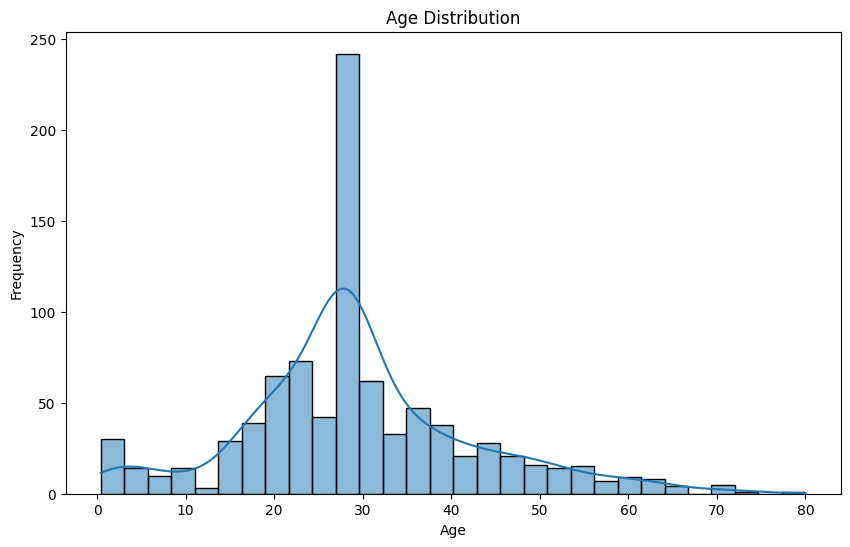

In [39]:
plt.figure(figsize=(10,6))
sns.histplot(data=titanic, x='Age', kde=True, bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

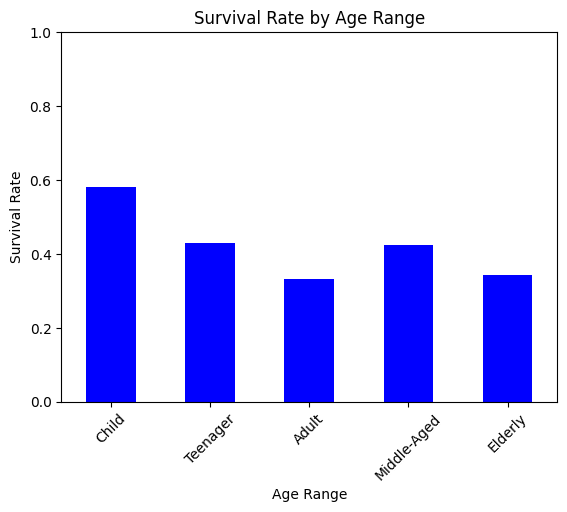

In [62]:
# Membuat kolom 'AgeRange' berdasarkan rentang usia
titanic['AgeRange'] = pd.cut(titanic['Age'], bins=[0, 12, 18, 30, 50, 200],
                             labels=['Child', 'Teenager', 'Adult', 'Middle-Aged', 'Elderly'])

# Menghitung tingkat kelangsungan hidup untuk setiap rentang usia
survival_rate_by_age = titanic.groupby('AgeRange')['Survived'].mean()

# Plot bar chart
survival_rate_by_age.plot(kind='bar', color='blue')

plt.title('Survival Rate by Age Range')
plt.xlabel('Age Range')
plt.ylabel('Survival Rate')
plt.ylim([0, 1])  # Mengatur batas sumbu y dari 0 hingga 1
plt.xticks(rotation=45)  # Mengatur rotasi label sumbu x menjadi 45 derajat
plt.show()

In [40]:
survival_counts = titanic['Survived'].value_counts()

print("Jumlah penumpang yang tidak selamat:", survival_counts[0])
print("Jumlah penumpang yang selamat:", survival_counts[1])

Jumlah penumpang yang tidak selamat: 549
Jumlah penumpang yang selamat: 342


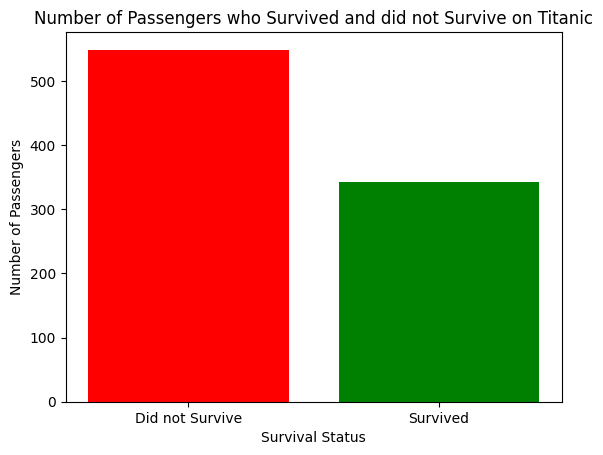

In [41]:
survival_counts = titanic['Survived'].value_counts()

plt.bar(survival_counts.index, survival_counts, color=['red', 'green'])
plt.xlabel('Survival Status')
plt.ylabel('Number of Passengers')
plt.title('Number of Passengers who Survived and did not Survive on Titanic')
plt.xticks(ticks=[0, 1], labels=['Did not Survive', 'Survived'])
plt.show()

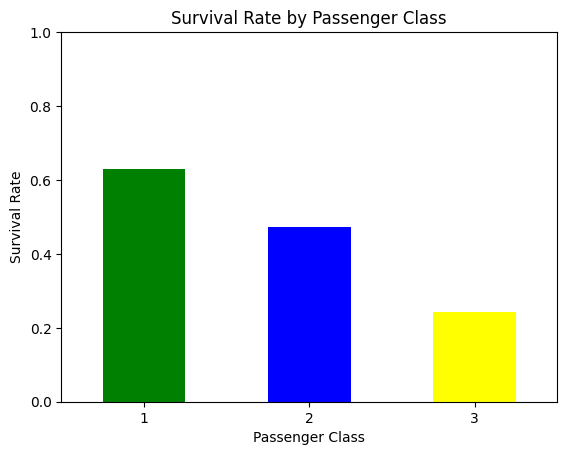

In [61]:
# Menghitung tingkat kelangsungan hidup untuk setiap kelas penumpang
survival_rate_by_class = titanic.groupby('Pclass')['Survived'].mean()

# Plot bar chart
survival_rate_by_class.plot(kind='bar', color=['green', 'blue', 'yellow'])

plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.ylim([0, 1])  # Mengatur batas sumbu y dari 0 hingga 1
plt.xticks(rotation=0)  # Mengatur rotasi label sumbu x menjadi horizontal
plt.show()

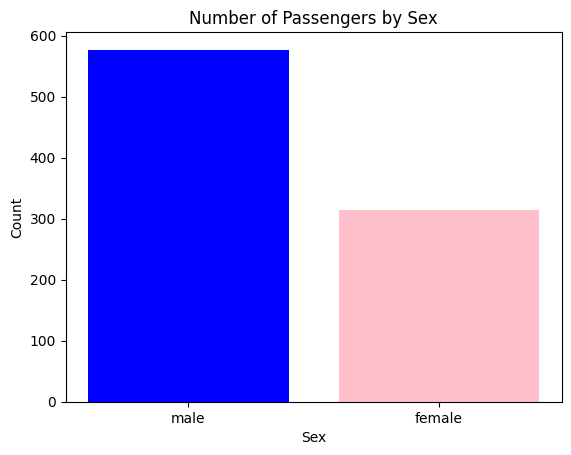

In [54]:
sex = titanic['Sex'].value_counts()

plt.bar(sex.index, sex.values, color=['blue', 'pink'])
plt.title('Number of Passengers by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

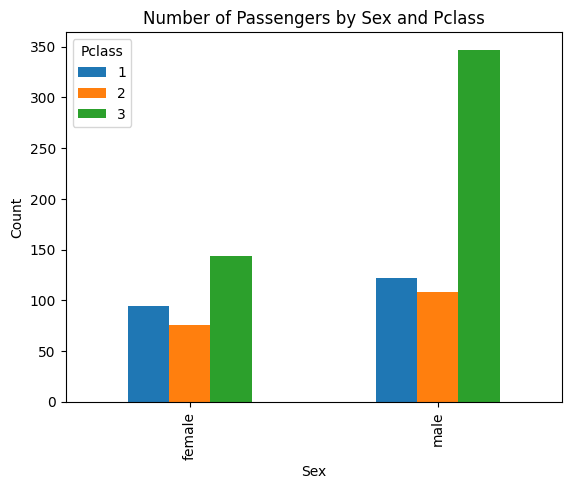

In [52]:
sex_pclass_counts = titanic.groupby(['Sex', 'Pclass']).size().unstack()
sex_pclass_counts.plot.bar()
plt.title('Number of Passengers by Sex and Pclass')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

In [64]:
class_with_highest_survival_rate = titanic.groupby('Pclass')['Survived'].mean().idxmax()  # Kelas penumpang dengan tingkat kelangsungan hidup tertinggi
age_range_with_highest_survival_rate = titanic.groupby('AgeRange')['Survived'].mean().idxmax()  # Rentang umur dengan tingkat kelangsungan hidup tertinggi
gender_with_highest_survival_rate = titanic.groupby('Sex')['Survived'].mean().idxmax()  # Jenis kelamin dengan tingkat kelangsungan hidup tertinggi

portfolio_summary = {
    'Passenger Class with Highest Survival Rate': class_with_highest_survival_rate,
    'Age Range with Highest Survival Rate': age_range_with_highest_survival_rate,
    'Gender with Highest Survival Rate': gender_with_highest_survival_rate
}

print("Portfolio Summary:")
for key, value in portfolio_summary.items():
    print(f"- {key}: {value}")

Portfolio Summary:
- Passenger Class with Highest Survival Rate: 1
- Age Range with Highest Survival Rate: Child
- Gender with Highest Survival Rate: female
